In [1]:
# ! pip install imbalanced-learn

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler

import pickle
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
df = pd.read_csv("final_data.csv")
df.head(5)

,gender,age(year),race_and_hispanic_origin,country_of_birth,usa_citizenship,highest_education_grade_received,marital_status,no_of_people_in_the_household,family_size,total_family_income,veteran_status,e_cigarette_use
0,2.0,48.0,3.0,1.0,1.0,3.0,1.0,4.0,4.0,5.0,2.0,Did not smoke
1,1.0,16.0,4.0,1.0,1.0,4.0,1.0,4.0,4.0,7.0,2.0,Did not smoke
2,1.0,64.0,4.0,1.0,1.0,4.0,1.0,3.0,3.0,7.0,2.0,Did not smoke
3,1.0,61.0,1.0,1.0,1.0,3.0,1.0,4.0,4.0,4.0,1.0,Did not smoke
4,1.0,31.0,4.0,1.0,1.0,4.0,5.0,4.0,1.0,7.0,1.0,Smoked


In [4]:
df["e_cigarette_use"].value_counts()

e_cigarette_use
Did not smoke    12465
Smoked             199
Name: count, dtype: int64

In [5]:
df["e_cigarette_use"] = df["e_cigarette_use"].map({"Did not smoke": 0, "Smoked": 1})
selected_features = ['gender', 'age(year)', 'race_and_hispanic_origin', 'country_of_birth',
                     'marital_status', 'veteran_status', 'highest_education_grade_received', "e_cigarette_use"]
df = df[selected_features]
df

,gender,age(year),race_and_hispanic_origin,country_of_birth,marital_status,veteran_status,highest_education_grade_received,e_cigarette_use
0,2.0,48.0,3.0,1.0,1.0,2.0,3.0,0
1,1.0,16.0,4.0,1.0,1.0,2.0,4.0,0
2,1.0,64.0,4.0,1.0,1.0,2.0,4.0,0
3,1.0,61.0,1.0,1.0,1.0,1.0,3.0,0
4,1.0,31.0,4.0,1.0,5.0,1.0,4.0,1
...,...,...,...,...,...,...,...,...
12659,1.0,34.0,3.0,2.0,5.0,2.0,2.0,0
12660,2.0,67.0,6.0,2.0,1.0,2.0,3.0,0
12661,2.0,36.0,6.0,2.0,5.0,2.0,3.0,1
12662,1.0,45.0,3.0,2.0,1.0,2.0,5.0,0


In [6]:
df = df[df["veteran_status"] != 7]

In [7]:
X = df.drop("e_cigarette_use", axis=1) 
y = df["e_cigarette_use"]

In [8]:
X["veteran_status"].value_counts()

veteran_status
2.0    11867
1.0      796
Name: count, dtype: int64

In [9]:
list(X.columns)

['gender',
 'age(year)',
 'race_and_hispanic_origin',
 'country_of_birth',
 'marital_status',
 'veteran_status',
 'highest_education_grade_received']

In [10]:
# Upsampling using ADASYN


adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

e_cigarette_use
0    12464
1    12412
Name: count, dtype: int64


In [11]:
X = df.drop("e_cigarette_use", axis=1) 
y = df["e_cigarette_use"]

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [12]:
# rf_classifier = RandomForestClassifier()

# # Define the hyperparameter grid to search over
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Instantiate GridSearchCV
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit the model with different hyperparameter combinations
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters and corresponding accuracy
# print("Best Hyperparameters: ", grid_search.best_params_)
# print("Best Accuracy: {:.2f}".format(grid_search.best_score_))

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print("Test Set Accuracy: {:.2f}".format(test_accuracy))

In [13]:
# From Hyperparameter tuning, we got that the optimal values for: max_depth=None, 
# min_samples_leaf=1, min_samples_split=5, n_estimators=50).fit(X_train, y_train

rfc = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5,
                                    n_estimators=10).fit(X_train, y_train)

y_pred = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy: {:.4f}".format(test_accuracy))

Test Set Accuracy: 0.9763


In [14]:
f1_score(y_test, y_pred, average='weighted')

0.9762836450413366

In [15]:
with open("rfc.pkl", mode="wb") as file:
    pickle.dump(rfc, file)

<IPython.core.display.Javascript object>


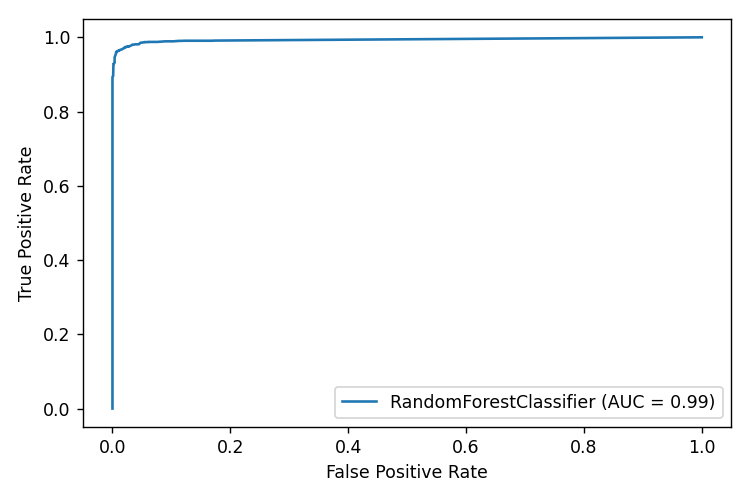

In [16]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax)
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
fig.tight_layout()
plt.savefig("model_AUC.png")

In [17]:
import numpy as np

probabilities = rfc.predict_proba(X_test.iloc[:5])

predicted_classes = np.argmax(probabilities, axis=1)

for i, (predicted_class, true_class) in enumerate(zip(predicted_classes, y_test[:5])):
    print(f"True Class: {true_class}, Predicted Class: {predicted_class} with probability of: {round(probabilities[i, predicted_class], 2)}")

True Class: 0, Predicted Class: 0 with probability of: 1.0
True Class: 0, Predicted Class: 0 with probability of: 1.0
True Class: 0, Predicted Class: 0 with probability of: 0.95
True Class: 1, Predicted Class: 1 with probability of: 1.0
True Class: 1, Predicted Class: 1 with probability of: 1.0


In [18]:
import json

Values = {
    "gender": {"Male": 1, 
              "Female": 2},
    "race_and_hispanic_origin": {"Mexican American": 1,
                                "Other Hispanic": 2,
                                "Non-Hispanic White": 3,
                                "Non-Hispanic Black": 4,
                                "Other Race - Including Multi-Racial": 5},
    "country_of_birth": {"Born in 50 US states or Washington, DC": 1, 
                        "Others": 1},
    "marital_status": {"Married/Living with Partner": 1,
                      "Widowed/Divorced/Separated": 2,
                      "Never married": 3},
    "veteran_status": {"Veteran": 2,
                       "Non-Veteran": 1},
    "highest_education_grade_received": {"Less than 9th grade": 1,
                                        "9-11th grade (Includes 12th grade with no diploma)": 2,
                                        "High school graduate/GED or equivalent": 3,
                                        "Some college or AA degree": 4,
                                        "College graduate or above": 5}
    }

with open("codified_imput.json", "wt") as file:
    json.dump(Values, file)
    
    

In [19]:
with open("codified_imput.json", "rt") as file:
    vals= json.load(file)
    
vals

{'gender': {'Male': 1, 'Female': 2},
 'race_and_hispanic_origin': {'Mexican American': 1,
  'Other Hispanic': 2,
  'Non-Hispanic White': 3,
  'Non-Hispanic Black': 4,
  'Other Race - Including Multi-Racial': 5},
 'country_of_birth': {'Born in 50 US states or Washington, DC': 1,
  'Others': 1},
 'marital_status': {'Married/Living with Partner': 1,
  'Widowed/Divorced/Separated': 2,
  'Never married': 3},
 'veteran_status': {'Veteran': 2, 'Non-Veteran': 1},
 'highest_education_grade_received': {'Less than 9th grade': 1,
  '9-11th grade (Includes 12th grade with no diploma)': 2,
  'High school graduate/GED or equivalent': 3,
  'Some college or AA degree': 4,
  'College graduate or above': 5}}